# Assignment 5 SPARQL queries

##### Sara Pérez García
I would like you to create the SPARQL query that will answer each of these questions.  Please submit the queries simply as a text document (NO programming is required!) - submit to GitHub as usual.  

For many of these you will need to look-up how to use the SPARQL functions ‘COUNT’ and ‘DISTINCT’ (we used ‘distinct’ in class), and probably a few others...
-----------------------------------------


UniProt SPARQL Endpoint:  http://sparql.uniprot.org/sparql/

### 1 POINT  How many protein records are in UniProt? 

In [1]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/>
SELECT (STR(COUNT(?protein)) AS ?Total_Protein_records)
WHERE
{
    ?protein a up:Protein .
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

Total_Protein_records
281303435


### 1 POINT How many Arabidopsis thaliana protein records are in UniProt? 

In [2]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX taxon:<http://purl.uniprot.org/taxonomy/> 
 
SELECT (STR(COUNT(?protein)) as ?Total_Arabidopsis_prot)
WHERE
{
    ?protein a up:Protein .
    ?protein up:organism taxon:3702 . #Arabidopsis thaliana taxon identifier
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

Total_Arabidopsis_prot
89182


### 1 POINT:  What is the description of the enzyme activity of UniProt Protein Q9SZZ8 

In [1]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/> 
PREFIX uni:<http://purl.uniprot.org/uniprot/>
 
SELECT ?activity_label
WHERE
{
    uni:Q9SZZ8 a up:Protein .
    uni:Q9SZZ8 up:enzyme ?enzyme .
    ?enzyme up:activity ?activity.
    ?activity rdfs:label ?activity_label .
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

activity_label
Beta-carotene + 4 reduced ferredoxin [iron-sulfur] cluster + 2 H(+) + 2 O(2) = zeaxanthin + 4 oxidized ferredoxin [iron-sulfur] cluster + 2 H(2)O.


### 1 POINT:  Retrieve the proteins ids, and date of submission, for proteins that have been added to UniProt this year   (HINT Google for “SPARQL FILTER by date”)

In [ ]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX skos:<http://www.w3.org/2004/02/skos/core#> 
PREFIX up:<http://purl.uniprot.org/core/> 
SELECT ?protein ?name ?date
WHERE
{
    ?protein a up:Protein . 
    ?protein up:created ?date .
    ?protein up:encodedBy ?gene . 
    ?gene skos:prefLabel ?name .
    FILTER ( ?date >= "2019-01-01"^^xsd:date) 
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

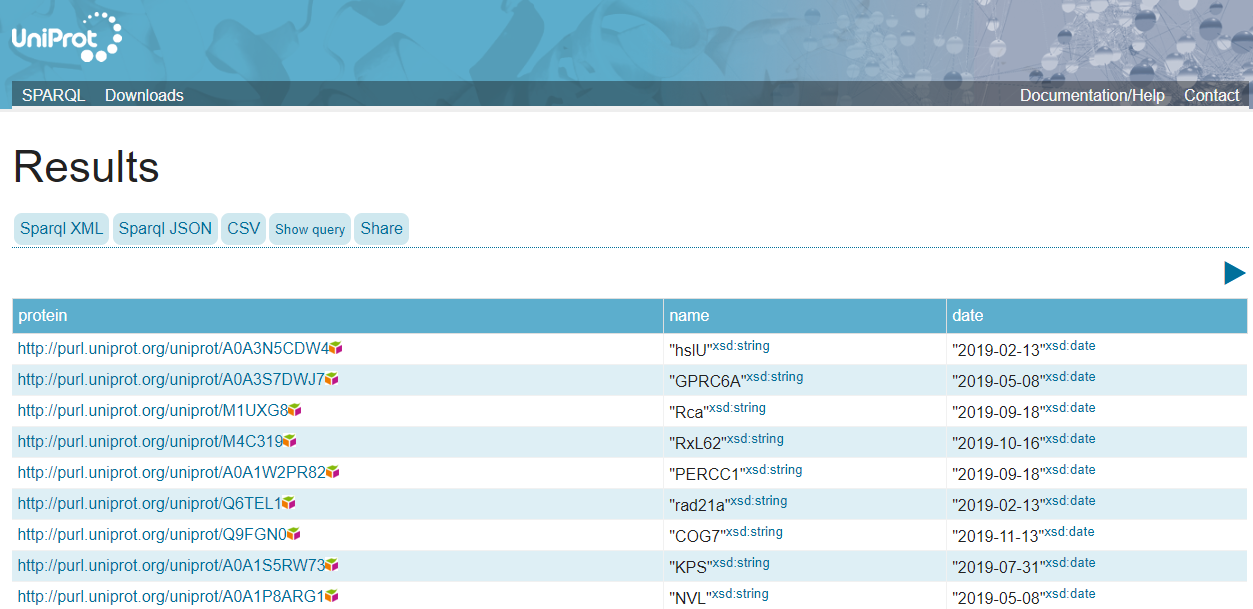

### 1 POINT How  many species are in the UniProt taxonomy?

In [4]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/> 
SELECT (COUNT(DISTINCT(?taxon)) as ?Species)
FROM <http://sparql.uniprot.org/taxonomy>
WHERE
{
    
    ?taxon a up:Taxon .
    ?taxon up:rank up:Species .
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

Species
1766921


### 1 POINT  How many species have at least one protein record?

In [1]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/> 
SELECT (COUNT(DISTINCT(?taxon)) as ?Species)
WHERE
{
    ?protein a up:Protein .
    ?protein up:organism ?taxon .
    ?taxon up:rank up:Species .  
}

Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

Species
984622


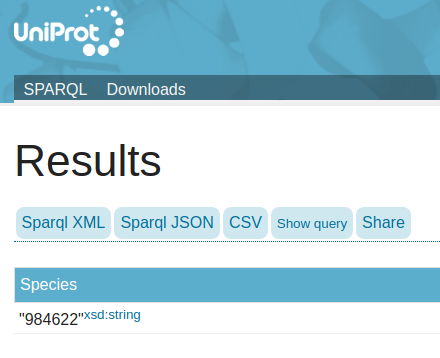

From the Atlas gene expression database SPARQL Endpoint: http://www.ebi.ac.uk/rdf/services/atlas/sparql

### 3 POINTS - get the experimental description for all experiments where the Arabidopsis Apetala3 gene is DOWN regulated 

In [1]:
%endpoint http://www.ebi.ac.uk/rdf/services/atlas/sparql
%format JSON

PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX atlasterms: <http://rdf.ebi.ac.uk/terms/expressionatlas/>
PREFIX atlas: <http://rdf.ebi.ac.uk/resource/expressionatlas/>
PREFIX emsembl:<http://rdf.ebi.ac.uk/resource/ensembl/>

SELECT distinct ?description
WHERE {
 ?expUri atlasterms:hasPart ?analysis .
 ?expUri dcterms:description ?description .
 ?analysis atlasterms:hasOutput ?value .
 ?value rdfs:label ?diffValue .
 ?value atlasterms:refersTo  emsembl:AT3G54340 .
 FILTER regex(?diffValue, "DOWN", "i") .
}

Endpoint set to: http://www.ebi.ac.uk/rdf/services/atlas/sparql
Return format: JSON

description
"Transcription profiling by array of Arabidopsis mutant for rdo2, rdo3 or rdo4"
Transcription profiling by array of Arabidopsis cax1/cax3 double mutants
"Transcription profiling by array of Arabidopsis ga1-3 mutants, brm-1 mutants and ga1-3, brm-1 double mutants"
"Transcription profiling of pistils from Arabidopsis wild type, ant-4 mutant and ino-1mutant plants at different developmental stages"
"Gene regulation by the seed maturation master regulators, LEC1, LEC2, FUS3 and ABI3 [set 2]"
"Gene regulation by the seed maturation master regulators, LEC1, LEC2, FUS3 and ABI3 [set 1]"
"RNA-seq of Arabidopsis rosette leaves at four time points (29, 35, 42, and 57 day) during developmental senescence"
"Transcription profiling by high throughput sequencing of Arabidopsis F1 hybrids from crosses between C24, Landsberg erecta (Ler) and Columbia (Col)"
Transcription profiling by high throughput sequencing of Arabidopsis developing wild type and val1 embryos


From the REACTOME database SPARQL endpoint:  http://www.ebi.ac.uk/rdf/services/reactome/sparql

### 2 POINTS:  How many REACTOME pathways are assigned to Arabidopsis (taxon 3702)? (note that REACTOME uses different URLs to define their taxonomy compared to UniProt, so you will first have to learn how to structure those URLs….)


In [4]:
%endpoint http://www.ebi.ac.uk/rdf/services/reactome/sparql
%format JSON

PREFIX biopax3: <http://www.biopax.org/release/biopax-level3.owl#>
PREFIX taxon:<http://identifiers.org/taxonomy/> 
SELECT (COUNT(DISTINCT(?pathway)) AS ?Total_Reactome_Pathways)
WHERE 
{
    ?pathway a biopax3:Pathway . 
    ?pathway biopax3:organism taxon:3702
}


Endpoint set to: http://www.ebi.ac.uk/rdf/services/reactome/sparql
Return format: JSON

Total_Reactome_Pathways
809


### 3 POINTS:  get all PubMed references for the pathway with the name “Degradation of the extracellular matrix”

In [2]:
%endpoint http://www.ebi.ac.uk/rdf/services/reactome/sparql
%format JSON

PREFIX biopax3: <http://www.biopax.org/release/biopax-level3.owl#>

SELECT DISTINCT (str(?pubmedId) AS ?pubmed_ID)
WHERE
{
    ?pathway a biopax3:Pathway .
    ?pathway biopax3:displayName ?name . 
    ?pathway biopax3:xref ?ref . 
    ?red biopax3:db ?db . 
    ?red biopax3:id ?pubmedId . 
    FILTER(str(?name) = 'Degradation of the extracellular matrix') .
    FILTER(str(?db) ='Pubmed') 
}

Endpoint set to: http://www.ebi.ac.uk/rdf/services/reactome/sparql
Return format: JSON

pubmed_ID
12036349
12825937
15689149
16302824
16408008
17228881
17636946
18754654
19053771
19338303


BONUS QUERIES

### UniProt BONUS 2 points:  find the AGI codes and gene names for all Arabidopsis thaliana  proteins that have a protein function annotation description that mentions “pattern formation”

In [1]:
%endpoint http://sparql.uniprot.org/sparql
%format JSON

PREFIX up:<http://purl.uniprot.org/core/>
PREFIX taxon:<http://purl.uniprot.org/taxonomy/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX skos:<http://www.w3.org/2004/02/skos/core#>

SELECT ?AGI ?name
WHERE
{
    ?protein a up:Protein .
    ?protein up:organism taxon:3702 .
    ?protein up:encodedBy ?gene .
    ?protein up:annotation  ?annot .
    ?gene up:locusName ?AGI . 
    ?gene skos:prefLabel ?name . 
    ?annot a up:Function_Annotation . 
    ?annot rdfs:comment ?annotComment . 
    FILTER CONTAINS(?annotComment, 'pattern formation') 
}


Endpoint set to: http://sparql.uniprot.org/sparql
Return format: JSON

AGI,name
At1g63700,YDA
At3g09090,DEX1
At4g21750,ATML1
At1g13980,GN
At1g26830,CUL3A
At2g46710,ROPGAP3
At5g40260,SWEET8
At1g69670,CUL3B
At5g55250,IAMT1
At4g37650,SHR


### REACTOME BONUS 2 points:  write a query that proves that all Arabidopsis pathway annotations in Reactome are “inferred from electronic annotation” (evidence code)  (...and therefore are probably garbage!!!)

In [5]:
%endpoint http://www.ebi.ac.uk/rdf/services/reactome/sparql
%format JSON

PREFIX biopax3: <http://www.biopax.org/release/biopax-level3.owl#>
PREFIX taxon:<http://identifiers.org/taxonomy/> 
SELECT  distinct ?code_term
WHERE 
{
  ?pathway a biopax3:Pathway . 
  ?pathway biopax3:organism taxon:3702 .
  ?pathway biopax3:evidence ?evidence .
  ?evidence biopax3:evidenceCode ?code .
  ?code biopax3:term ?code_term .
}

Endpoint set to: http://www.ebi.ac.uk/rdf/services/reactome/sparql
Return format: JSON

code_term
inferred from electronic annotation


When selecting all the distinct evidence code terms from the arabidopsis pathway annotations, the only result is 'inferred from electronic annotation'. This means that there are no other anotatations in reactome apart from this one in the Arabidopsis pathways. The query below is the same one but just counting how many diferent arabidopsis pathways annotations are there, which it is only one ('inferred from electronic annotation').

In [11]:
%endpoint http://www.ebi.ac.uk/rdf/services/reactome/sparql
%format JSON

PREFIX biopax3: <http://www.biopax.org/release/biopax-level3.owl#>
PREFIX taxon:<http://identifiers.org/taxonomy/> 
SELECT  (COUNT(distinct(?code_term)) as ?total_different_anotations)
WHERE 
{
  ?pathway a biopax3:Pathway . 
  ?pathway biopax3:organism taxon:3702 .
  ?pathway biopax3:evidence ?evidence .
  ?evidence biopax3:evidenceCode ?code .
  ?code biopax3:term ?code_term .
}

Endpoint set to: http://www.ebi.ac.uk/rdf/services/reactome/sparql
Return format: JSON

total_different_anotations
1
